In [ ]:
# ..... get files for batch-correction estimation ..... #

In [2]:
library(Seurat)
library(dplyr)
library(SingleCellExperiment)

In [3]:
currstage = 'stage14'

# get UMAPs for before-integration batch-mixing in clusters
immune.combined.sct = readRDS(paste0(currstage, '_integrated_cca.rds'))

# get all counts
s1 = CreateSeuratObject(counts = immune.combined.sct@assays$RNA@counts,                                                
                        meta.data = immune.combined.sct@meta.data)

# normalize and identify variable features for each dataset independently
s1 <- NormalizeData(s1)
s1 <- FindVariableFeatures(s1, selection.method = "vst", nfeatures = 3000)
s1 <- ScaleData(s1, verbose = FALSE)

Normalizing layer: counts

Finding variable features for layer counts



In [4]:
# run pca, umap
s1 <- RunPCA(s1, verbose = FALSE)
s1 <- RunUMAP(s1, reduction = "pca", dims = 1:30)

# cluster integrated data
s1 <- FindNeighbors(s1, reduction = "pca", dims = 1:30)
s1 <- FindClusters(s1, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
07:47:27 UMAP embedding parameters a = 0.9922 b = 1.112

07:47:27 Read 26421 rows and found 30 numeric columns

07:47:27 Using Annoy for neighbor search, n_neighbors = 30

07:47:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:47:31 Writing NN index file to temp file /tmp/Rtmps6krjX/file1004296ceecb6

07:47:31 Searching Annoy index using 1 thread, search_k = 3000

07:47:38 Annoy recall = 100%

07:47:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26421
Number of edges: 942709

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9382
Number of communities: 20
Elapsed time: 3 seconds


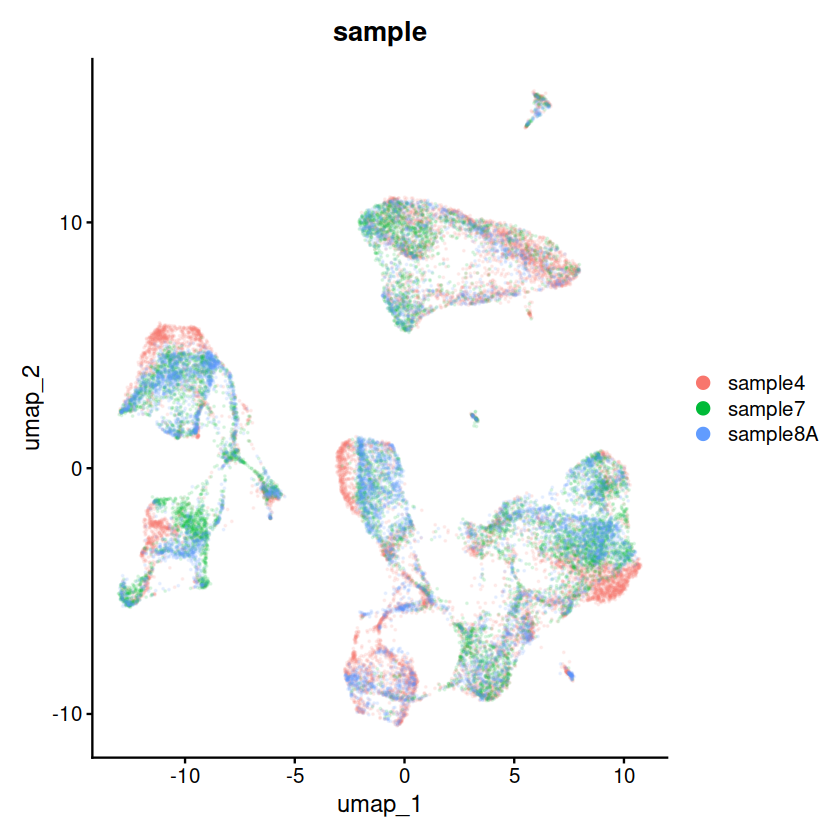

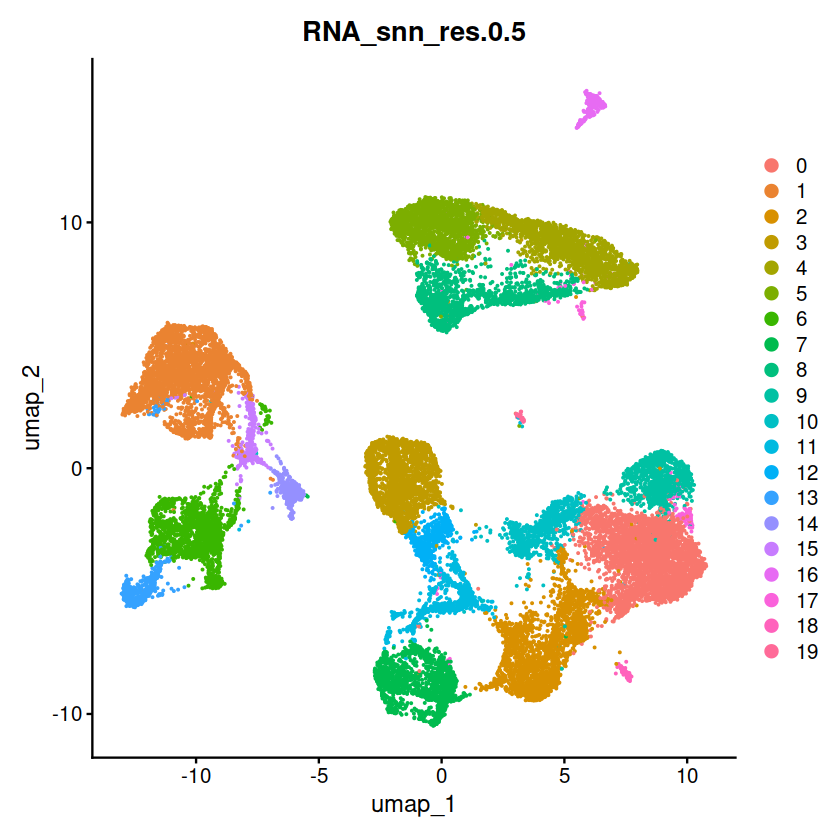

In [5]:
# plot integrated umap
tplot <- DimPlot(s1, reduction = "umap", group.by = "sample")
tplot[[1]]$layers[[1]]$aes_params$alpha =  .1
tplot

# plot integrated umap
DimPlot(s1, reduction = "umap", group.by = "RNA_snn_res.0.5")

In [6]:
dfnew = data.frame(stage = currstage, sample = s1$sample, before_cls = s1$RNA_snn_res.0.5, 
                   before_pc1 = s1@reductions$pca@cell.embeddings[,1],
                   before_pc2 = s1@reductions$pca@cell.embeddings[,2],
                   before_umap1 = s1@reductions$umap@cell.embeddings[,1],
                   before_umap2 = s1@reductions$umap@cell.embeddings[,2],
                   cca_cls = s1$integrated_snn_res.0.5,
                   cca_pc1 = immune.combined.sct@reductions$pca@cell.embeddings[,1],
                   cca_pc2 = immune.combined.sct@reductions$pca@cell.embeddings[,2],
                   cca_umap1 = immune.combined.sct@reductions$umap@cell.embeddings[,1],
                   cca_umap2 = immune.combined.sct@reductions$umap@cell.embeddings[,2])
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage14_sample4_AAACCCACAATGAACA-1 stage14 sample4 0           6.660217 
stage14_sample4_AAACCCACACGACAAG-1 stage14 sample4 7           1.025334 
stage14_sample4_AAACCCACAGGCATGA-1 stage14 sample4 5          10.616578 
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage14_sample4_AAACCCACAATGAACA-1  13.153173 10.253815    -4.291662    14     
stage14_sample4_AAACCCACACGACAAG-1   8.966382 -2.670446    -8.271424    8      
stage14_sample4_AAACCCACAGGCATGA-1 -14.494120 -1.654324    10.164834    2      
                                   cca_pc1   cca_pc2    cca_umap1 cca_umap2 
stage14_sample4_AAACCCACAATGAACA-1 -16.50986  18.229045 5.263206    8.684162
stage14_sample4_AAACCCACACGACAAG-1 -12.82759   2.663251 3.262806    3.087486
stage14_sample4_AAACCCACAGGCATGA-1 -13.27209 -23.218618 2.902363  -13.130796

In [7]:
# get data from rpca
s2 = readRDS(paste0(currstage, '_integrated_rpca.rds'))

dfnew$rpca_cls = s2$integrated_snn_res.0.5
dfnew$rpca_pc1 = s2@reductions$pca@cell.embeddings[,1]
dfnew$rpca_pc2 = s2@reductions$pca@cell.embeddings[,2]
dfnew$rpca_umap1 = s2@reductions$umap@cell.embeddings[,1]
dfnew$rpca_umap2 = s2@reductions$umap@cell.embeddings[,2]
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage14_sample4_AAACCCACAATGAACA-1 stage14 sample4 0           6.660217 
stage14_sample4_AAACCCACACGACAAG-1 stage14 sample4 7           1.025334 
stage14_sample4_AAACCCACAGGCATGA-1 stage14 sample4 5          10.616578 
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage14_sample4_AAACCCACAATGAACA-1  13.153173 10.253815    -4.291662    14     
stage14_sample4_AAACCCACACGACAAG-1   8.966382 -2.670446    -8.271424    8      
stage14_sample4_AAACCCACAGGCATGA-1 -14.494120 -1.654324    10.164834    2      
                                   cca_pc1   cca_pc2    cca_umap1 cca_umap2 
stage14_sample4_AAACCCACAATGAACA-1 -16.50986  18.229045 5.263206    8.684162
stage14_sample4_AAACCCACACGACAAG-1 -12.82759   2.663251 3.262806    3.087486
stage14_sample4_AAACCCACAGGCATGA-1 -13.27209 -23.218618 2.902363  -13.130796
                                   rpca_cls rpca_pc1   rpca_pc2   rpca_umap1
stage14_sample4_AAACCCACAATGAACA-1 9         -9.527403 -24.344489 7.517502  
stage14_sample4_AAACCCACACGACAAG-1 8        -11.180247  -6.444547 2.627437  
stage14_sample4_AAACCCACAGGCATGA-1 1        -18.938026  22.014721 6.364504  
                                   rpca_umap2
stage14_sample4_AAACCCACAATGAACA-1 -3.191663 
stage14_sample4_AAACCCACACGACAAG-1 -1.419018 
stage14_sample4_AAACCCACAGGCATGA-1  7.432613

In [10]:
# data from fastMNN
load(paste0(currstage, '_fastMNN.Rdata'))

pcs = reducedDims(combined)[['corrected']]
tsnes = reducedDims(combined)[['TSNE']]
dfnew$mnn_pc1 = unlist(pcs[,1])
dfnew$mnn_pc2 = unlist(pcs[,2])
dfnew$mnn_tsne1 = unlist(tsnes[,1])
dfnew$mnn_tsne2 = unlist(tsnes[,2])
dfnew[1:3,]

Loading required package: BiocSingular



stage   sample  before_cls before_pc1
stage14_sample4_AAACCCACAATGAACA-1 stage14 sample4 0           6.660217 
stage14_sample4_AAACCCACACGACAAG-1 stage14 sample4 7           1.025334 
stage14_sample4_AAACCCACAGGCATGA-1 stage14 sample4 5          10.616578 
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage14_sample4_AAACCCACAATGAACA-1  13.153173 10.253815    -4.291662    14     
stage14_sample4_AAACCCACACGACAAG-1   8.966382 -2.670446    -8.271424    8      
stage14_sample4_AAACCCACAGGCATGA-1 -14.494120 -1.654324    10.164834    2      
                                   cca_pc1   cca_pc2    ⋯ cca_umap2  rpca_cls
stage14_sample4_AAACCCACAATGAACA-1 -16.50986  18.229045 ⋯   8.684162 9       
stage14_sample4_AAACCCACACGACAAG-1 -12.82759   2.663251 ⋯   3.087486 8       
stage14_sample4_AAACCCACAGGCATGA-1 -13.27209 -23.218618 ⋯ -13.130796 1       
                                   rpca_pc1   rpca_pc2   rpca_umap1 rpca_umap2
stage14_sample4_AAACCCACAATGAACA-1  -9.527403 -24.344489 7.517502   -3.191663 
stage14_sample4_AAACCCACACGACAAG-1 -11.180247  -6.444547 2.627437   -1.419018 
stage14_sample4_AAACCCACAGGCATGA-1 -18.938026  22.014721 6.364504    7.432613 
                                   mnn_pc1     mnn_pc2      mnn_tsne1  
stage14_sample4_AAACCCACAATGAACA-1 -0.15736549  0.240220068   0.8871135
stage14_sample4_AAACCCACACGACAAG-1 -0.01126183  0.112083862  34.8204108
stage14_sample4_AAACCCACAGGCATGA-1  0.19318532 -0.001489743 -36.4748965
                                   mnn_tsne2
stage14_sample4_AAACCCACAATGAACA-1 25.055873
stage14_sample4_AAACCCACACGACAAG-1  4.102318
stage14_sample4_AAACCCACAGGCATGA-1  1.973381

In [11]:
# data from scanorama
t1 = read.delim(paste0(currstage, '_scanorama_pca.csv'), sep = ',', header = F)
t2 = read.delim(paste0(currstage, '_scanorama_umap.csv'), sep = ',', header = F)
t3 = read.delim(paste0(currstage, '_scanorama_clusters.csv'), sep = ',', header = T)
dfnew$scanorama_cls = t3$clusters
dfnew$scanorama_pc1 = t1[,1]
dfnew$scanorama_pc2 = t1[,2]
dfnew$scanorama_umap1 = t2[,1]
dfnew$scanorama_umap2 = t2[,2]
dfnew[1:3,]

stage   sample  before_cls before_pc1
stage14_sample4_AAACCCACAATGAACA-1 stage14 sample4 0           6.660217 
stage14_sample4_AAACCCACACGACAAG-1 stage14 sample4 7           1.025334 
stage14_sample4_AAACCCACAGGCATGA-1 stage14 sample4 5          10.616578 
                                   before_pc2 before_umap1 before_umap2 cca_cls
stage14_sample4_AAACCCACAATGAACA-1  13.153173 10.253815    -4.291662    14     
stage14_sample4_AAACCCACACGACAAG-1   8.966382 -2.670446    -8.271424    8      
stage14_sample4_AAACCCACAGGCATGA-1 -14.494120 -1.654324    10.164834    2      
                                   cca_pc1   cca_pc2    ⋯ rpca_umap2
stage14_sample4_AAACCCACAATGAACA-1 -16.50986  18.229045 ⋯ -3.191663 
stage14_sample4_AAACCCACACGACAAG-1 -12.82759   2.663251 ⋯ -1.419018 
stage14_sample4_AAACCCACAGGCATGA-1 -13.27209 -23.218618 ⋯  7.432613 
                                   mnn_pc1     mnn_pc2      mnn_tsne1  
stage14_sample4_AAACCCACAATGAACA-1 -0.15736549  0.240220068   0.8871135
stage14_sample4_AAACCCACACGACAAG-1 -0.01126183  0.112083862  34.8204108
stage14_sample4_AAACCCACAGGCATGA-1  0.19318532 -0.001489743 -36.4748965
                                   mnn_tsne2 scanorama_cls scanorama_pc1
stage14_sample4_AAACCCACAATGAACA-1 25.055873 0             -0.16471687  
stage14_sample4_AAACCCACACGACAAG-1  4.102318 7             -0.03910707  
stage14_sample4_AAACCCACAGGCATGA-1  1.973381 2              0.16880578  
                                   scanorama_pc2 scanorama_umap1
stage14_sample4_AAACCCACAATGAACA-1 0.2057455119  -1.400538      
stage14_sample4_AAACCCACACGACAAG-1 0.0902315890  12.305484      
stage14_sample4_AAACCCACAGGCATGA-1 0.0001787118   2.618795      
                                   scanorama_umap2
stage14_sample4_AAACCCACAATGAACA-1 12.115611      
stage14_sample4_AAACCCACACGACAAG-1  9.425957      
stage14_sample4_AAACCCACAGGCATGA-1  1.647866

In [31]:
# MetaMarker-based anno from Qiu and KS datasets
tab1 = read.delim(paste0(currstage, '_Qiu_celltypes.csv'), sep = ',')
tab1[1,]
tab2 = read.delim(paste0(currstage, '_Knight-Schrijver_celltypes.csv'), sep = ',')
tab2[1,]

barcode                            class          celltype         
1 stage13_sample1_AAACCCAGTCGAGTTT-1 Cardiomyocytes First heart field
  final_celltype   
1 First heart field

barcode                            class          celltype                  
1 stage13_sample1_AAACCCAGTCGAGTTT-1 Cardiomyocytes Ventricular_Cardiomyocytes
  final_celltype            
1 Ventricular_Cardiomyocytes

In [32]:
dfnew$Qiu_class = tab1$class[match(rownames(dfnew), tab1$barcode)]
dfnew$Qiu_celltype = tab1$final_celltype[match(rownames(dfnew), tab1$barcode)]
dfnew$KS_class = tab2$class[match(rownames(dfnew), tab2$barcode)]
dfnew$KS_celltype = tab2$final_celltype[match(rownames(dfnew), tab2$barcode)]

In [33]:
# save file
write.table(dfnew, file = paste0(currstage, '_batch_corrected_embeddings.csv'), sep = ',', row.names = T,
           col.names = T, quote = F)

In [ ]:
# Seurat to SCE
sc.seurat <- as.Seurat(combined, counts = "counts", data = "logcounts")